___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  green solid !important;
  color: black !important;
}
</style><style>.container { width:100% !important; }

## Indest Data

In [3]:
df0 = pd.read_csv("Churn_Modelling.csv")
df = df0.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [9]:
df.duplicated().value_counts()

False    10000
dtype: int64

In [10]:
df.shape

(10000, 11)

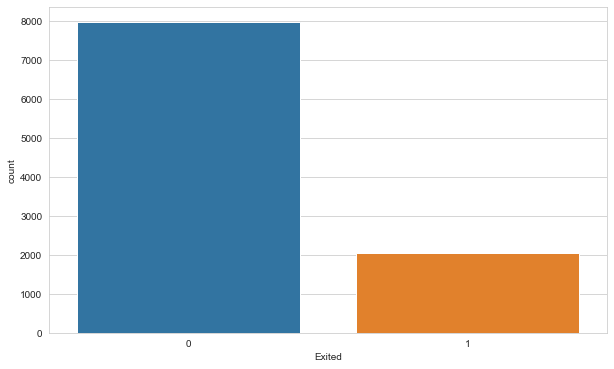

In [11]:
sns.countplot(df['Exited']);

<AxesSubplot:>

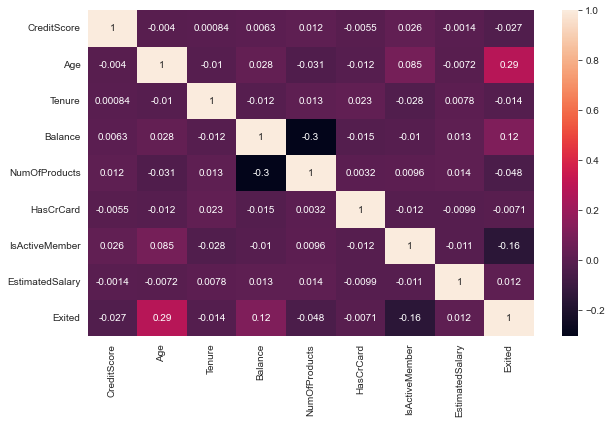

In [12]:
sns.heatmap(df.corr(), annot=True)

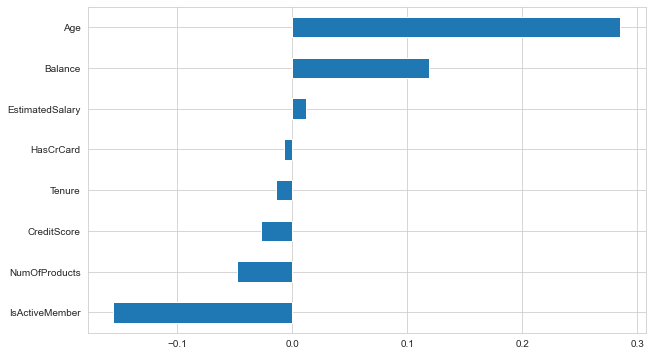

In [13]:
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [14]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


## Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis = 1)
y = df['Exited'].values

In [18]:
seed = 42

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [23]:
X_train.shape

(9000, 11)

In [24]:
X_test.shape

(1000, 11)

### Creating Model

### without class_weigth

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [41]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=15)

In [42]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, verbose=1, callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 4s 29ms/step - loss: 0.5172 - recall: 0.0000e+00 - val_loss: 0.4901 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 1s 12ms/step - loss: 0.4887 - recall: 0.0000e+00 - val_loss: 0.4738 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 1s 11ms/step - loss: 0.4767 - recall: 0.0000e+00 - val_loss: 0.4609 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 1s 11ms/step - loss: 0.4669 - recall: 0.0000e+00 - val_loss: 0.4496 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 1s 16ms/step - loss: 0.4589 - recall: 0.0000e+00 - val_loss: 0.4411 - val_recall: 0.0055
Epoch 6/200
64/64 [==============================] - 1s 12ms/step - loss: 0.4518 - recall: 0.0018 - val_loss: 0.4330 - val_recall: 0.0055
Epoch 7/200
64/64 [==============================] - 1s 11ms/step - loss: 0.4460 - recall: 0.0230 - val_loss: 0.4263 - val_recall: 0.071

64/64 [==============================] - 0s 5ms/step - loss: 0.3450 - recall: 0.4552 - val_loss: 0.3037 - val_recall: 0.5193
Epoch 61/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3463 - recall: 0.4510 - val_loss: 0.3037 - val_recall: 0.5028
Epoch 62/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3449 - recall: 0.4570 - val_loss: 0.3124 - val_recall: 0.5856
Epoch 63/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3443 - recall: 0.4498 - val_loss: 0.3048 - val_recall: 0.5414
Epoch 64/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3447 - recall: 0.4516 - val_loss: 0.3056 - val_recall: 0.5746
Epoch 65/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3438 - recall: 0.4552 - val_loss: 0.3043 - val_recall: 0.4917
Epoch 66/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3446 - recall: 0.4540 - val_loss: 0.3115 - val_recall: 0.5967
Epoch 67/200
64/64 [===========================

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                240       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.517,0.000,0.490,0.000
1,0.489,0.000,0.474,0.000
2,0.477,0.000,0.461,0.000
3,0.467,0.000,0.450,0.000
4,0.459,0.000,0.441,0.006


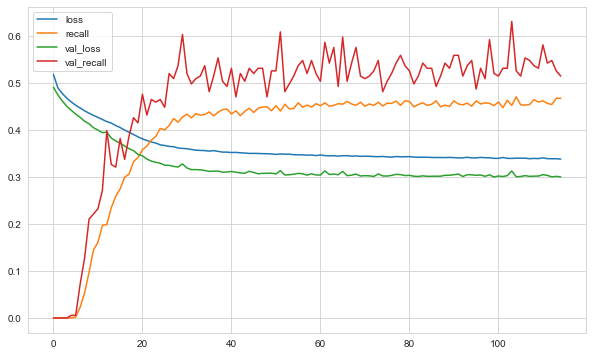

In [45]:
loss_df.plot();

#### Evaluate

In [48]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[767  29]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.76      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [66]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [67]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [68]:
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=128, epochs=200, verbose=1, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 5s 27ms/step - loss: 0.7075 - recall: 0.0581 - val_loss: 0.6524 - val_recall: 0.2265
Epoch 2/200
64/64 [==============================] - 1s 10ms/step - loss: 0.6806 - recall: 0.3214 - val_loss: 0.6392 - val_recall: 0.5138
Epoch 3/200
64/64 [==============================] - 1s 10ms/step - loss: 0.6658 - recall: 0.5442 - val_loss: 0.6087 - val_recall: 0.5746
Epoch 4/200
64/64 [==============================] - 1s 10ms/step - loss: 0.6468 - recall: 0.6162 - val_loss: 0.5764 - val_recall: 0.5912
Epoch 5/200
64/64 [==============================] - 1s 10ms/step - loss: 0.6289 - recall: 0.6489 - val_loss: 0.6232 - val_recall: 0.7569
Epoch 6/200
64/64 [==============================] - 1s 10ms/step - loss: 0.6158 - recall: 0.6846 - val_loss: 0.5655 - val_recall: 0.6519
Epoch 7/200
64/64 [==============================] - 1s 9ms/step - loss: 0.6069 - recall: 0.6840 - val_loss: 0.6120 - val_recall: 0.7735
Epoch 8/200
64/64 [================

64/64 [==============================] - 0s 5ms/step - loss: 0.4732 - recall: 0.7603 - val_loss: 0.4297 - val_recall: 0.8177
Epoch 61/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4745 - recall: 0.7688 - val_loss: 0.4152 - val_recall: 0.8122
Epoch 62/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4719 - recall: 0.7615 - val_loss: 0.4804 - val_recall: 0.8343
Epoch 63/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4717 - recall: 0.7609 - val_loss: 0.4453 - val_recall: 0.8287
Epoch 64/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4727 - recall: 0.7603 - val_loss: 0.4586 - val_recall: 0.8287
Epoch 65/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4706 - recall: 0.7657 - val_loss: 0.4021 - val_recall: 0.7845
Epoch 66/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4730 - recall: 0.7573 - val_loss: 0.4701 - val_recall: 0.8343
Epoch 67/200
64/64 [===========================

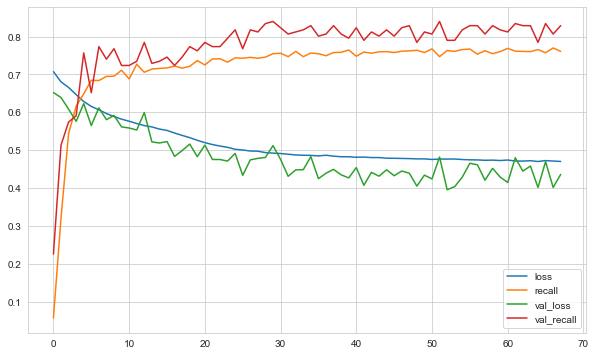

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Evaluate

In [70]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[594 202]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       796
           1       0.43      0.75      0.55       204

    accuracy                           0.75      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.75      0.77      1000



## GridSearchCV

In [71]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [72]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=20, activation='relu'))
    classifier.add(Dense(units=10, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [73]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [74]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]}


In [75]:
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 5s 9ms/step - loss: 0.6809 - recall: 0.3857
Epoch 2/200
71/71 [==============================] - 1s 8ms/step - loss: 0.6281 - recall: 0.6601
Epoch 3/200
71/71 [==============================] - 1s 8ms/step - loss: 0.5975 - recall: 0.6923
Epoch 4/200
71/71 [==============================] - 1s 8ms/step - loss: 0.5763 - recall: 0.7005
Epoch 5/200
71/71 [==============================] - 1s 8ms/step - loss: 0.5598 - recall: 0.7169
Epoch 6/200
71/71 [==============================] - 1s 8ms/step - loss: 0.5445 - recall: 0.7229
Epoch 7/200
71/71 [==============================] - 1s 8ms/step - loss: 0.5232 - recall: 0.7349
Epoch 8/200
71/71 [==============================] - 1s 8ms/step - loss: 0.5088 - recall: 0.7398
Epoch 9/200
71/71 [==============================] - 1s 8ms/step - loss: 0.4979 - recall: 0.7436
Epoch 10/200
71/71 [==============================] - 1s 8ms/step - loss: 0.4904 - recall: 0.7469
Epoch 11/200
71/71 [=========

71/71 [==============================] - 0s 3ms/step - loss: 0.4451 - recall: 0.7643
Epoch 85/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4459 - recall: 0.7676
Epoch 86/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4459 - recall: 0.7660
Epoch 87/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4456 - recall: 0.7676
Epoch 88/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4455 - recall: 0.7660
Epoch 89/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4444 - recall: 0.7692
Epoch 90/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4449 - recall: 0.7698
Epoch 91/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4449 - recall: 0.7670
Epoch 92/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4429 - recall: 0.7736
Epoch 93/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4445 - recall: 0.7703
Epoch 94/200
71/71 [=============

71/71 [==============================] - 0s 4ms/step - loss: 0.4334 - recall: 0.7769
Epoch 168/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4332 - recall: 0.7698
Epoch 169/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4315 - recall: 0.7747
Epoch 170/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4338 - recall: 0.7785
Epoch 171/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4320 - recall: 0.7834
Epoch 172/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4333 - recall: 0.7709
Epoch 173/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4303 - recall: 0.7834
Epoch 174/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4318 - recall: 0.7791
Epoch 175/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4324 - recall: 0.7736
Epoch 176/200
71/71 [==============================] - 0s 4ms/step - loss: 0.4298 - recall: 0.7730
Epoch 177/200
71/71 [===

#### Evaluate

## Final Model and Model Deployment

In [76]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [77]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
36/36 [==============================] - 4s 34ms/step - loss: 0.6926 - recall: 0.3486 - val_loss: 0.6500 - val_recall: 0.5294
Epoch 2/200
36/36 [==============================] - 0s 10ms/step - loss: 0.6598 - recall: 0.5423 - val_loss: 0.6366 - val_recall: 0.6373
Epoch 3/200
36/36 [==============================] - 0s 10ms/step - loss: 0.6271 - recall: 0.6568 - val_loss: 0.6527 - val_recall: 0.7108
Epoch 4/200
36/36 [==============================] - 0s 10ms/step - loss: 0.6054 - recall: 0.6967 - val_loss: 0.6535 - val_recall: 0.7353
Epoch 5/200
36/36 [==============================] - 0s 10ms/step - loss: 0.5893 - recall: 0.7098 - val_loss: 0.5781 - val_recall: 0.6618
Epoch 6/200
36/36 [==============================] - 0s 11ms/step - loss: 0.5755 - recall: 0.6939 - val_loss: 0.6595 - val_recall: 0.7794
Epoch 7/200
36/36 [==============================] - 0s 10ms/step - loss: 0.5666 - recall: 0.7092 - val_loss: 0.5460 - val_recall: 0.6667
Epoch 8/200
36/36 [===============

36/36 [==============================] - 0s 6ms/step - loss: 0.4600 - recall: 0.7638 - val_loss: 0.4457 - val_recall: 0.7255
Epoch 61/200
36/36 [==============================] - 0s 8ms/step - loss: 0.4571 - recall: 0.7703 - val_loss: 0.4631 - val_recall: 0.7451
Epoch 62/200
36/36 [==============================] - 0s 9ms/step - loss: 0.4538 - recall: 0.7714 - val_loss: 0.4785 - val_recall: 0.7843
Epoch 63/200
36/36 [==============================] - 0s 9ms/step - loss: 0.4554 - recall: 0.7720 - val_loss: 0.4659 - val_recall: 0.7647
Epoch 64/200
36/36 [==============================] - 0s 9ms/step - loss: 0.4547 - recall: 0.7692 - val_loss: 0.4431 - val_recall: 0.7304
Epoch 64: early stopping


In [78]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.443135529756546
recall :  0.7303921580314636


In [79]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[641 155]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.49      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



In [80]:
model.save('model_churn.h5')

### Prediction

In [89]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [90]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [91]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[1]])

In [92]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___